In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import joblib

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
dataset, scaler = joblib.load("../data/dataset_draft7_1.pkl")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gameId                     6884 non-null   object 
 1   Blue_Adc_assistsPerTime    6884 non-null   float64
 2   Blue_Adc_deathsPerTime     6884 non-null   float64
 3   Blue_Adc_killsPerTime      6884 non-null   float64
 4   Blue_Jgl_assistsPerTime    6884 non-null   float64
 5   Blue_Jgl_deathsPerTime     6884 non-null   float64
 6   Blue_Jgl_killsPerTime      6884 non-null   float64
 7   Blue_Mid_assistsPerTime    6884 non-null   float64
 8   Blue_Mid_deathsPerTime     6884 non-null   float64
 9   Blue_Mid_killsPerTime      6884 non-null   float64
 10  Blue_Spt_assistsPerTime    6884 non-null   float64
 11  Blue_Top_assistsPerTime    6884 non-null   float64
 12  Blue_Top_deathsPerTime     6884 non-null   float64
 13  Blue_Top_killsPerTime      6884 non-null   float

In [50]:
#dataset = pd.read_excel("../data/dataset_draft5_4.xlsx", index_col=0, dtype = {"gameId": "str"})
#dataset.info()

In [6]:
dataset["winner"].head()

0     Red
1    Blue
2     Red
3    Blue
4    Blue
Name: winner, dtype: object

In [7]:
label_incoder = LabelEncoder()
dataset["winner"] = label_incoder.fit_transform(dataset["winner"])
dataset["winner"].head()

0    1
1    0
2    1
3    0
4    0
Name: winner, dtype: int32

In [8]:
dropped_dataset = dataset.drop(["gameId"], axis=1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset.drop_duplicates(desired_X_column_list)
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Blue_Adc_assistsPerTime    6884 non-null   float64
 1   Blue_Adc_deathsPerTime     6884 non-null   float64
 2   Blue_Adc_killsPerTime      6884 non-null   float64
 3   Blue_Jgl_assistsPerTime    6884 non-null   float64
 4   Blue_Jgl_deathsPerTime     6884 non-null   float64
 5   Blue_Jgl_killsPerTime      6884 non-null   float64
 6   Blue_Mid_assistsPerTime    6884 non-null   float64
 7   Blue_Mid_deathsPerTime     6884 non-null   float64
 8   Blue_Mid_killsPerTime      6884 non-null   float64
 9   Blue_Spt_assistsPerTime    6884 non-null   float64
 10  Blue_Top_assistsPerTime    6884 non-null   float64
 11  Blue_Top_deathsPerTime     6884 non-null   float64
 12  Blue_Top_killsPerTime      6884 non-null   float64
 13  Red_Adc_assistsPerTime     6884 non-null   float

In [9]:
X.describe()

,Blue_Adc_assistsPerTime,Blue_Adc_deathsPerTime,Blue_Adc_killsPerTime,Blue_Jgl_assistsPerTime,Blue_Jgl_deathsPerTime,Blue_Jgl_killsPerTime,Blue_Mid_assistsPerTime,Blue_Mid_deathsPerTime,Blue_Mid_killsPerTime,Blue_Spt_assistsPerTime,Blue_Top_assistsPerTime,Blue_Top_deathsPerTime,Blue_Top_killsPerTime,Red_Adc_assistsPerTime,Red_Adc_deathsPerTime,Red_Adc_killsPerTime,Red_Jgl_assistsPerTime,Red_Jgl_deathsPerTime,Red_Jgl_killsPerTime,Red_Mid_assistsPerTime,Red_Mid_deathsPerTime,Red_Mid_killsPerTime,Red_Spt_assistsPerTime,Red_Top_assistsPerTime,Red_Top_deathsPerTime,Red_Top_killsPerTime,Blue_Winrate,Red_Winrate,Blue_GoldDiff,Red_GoldDiff,Blue_KillDiff,Red_KillDiff,headtoHeadWinrate,headtoHeadGoldDiff,headtoHeadKillDiff,Top_kdaDiff,Top_killsPerTimeDiff,Top_deathsPerTimeDiff,Top_assistsPerTimeDiff,Top_creepScorePerTimeDiff,Top_goldEarnedPerTimeDiff,Jgl_kdaDiff,Jgl_killsPerTimeDiff,Jgl_deathsPerTimeDiff,Jgl_assistsPerTimeDiff,Jgl_creepScorePerTimeDiff,Jgl_goldEarnedPerTimeDiff,Mid_kdaDiff,Mid_killsPerTimeDiff,Mid_deathsPerTimeDiff,Mid_assistsPerTimeDiff,Mid_creepScorePerTimeDiff,Mid_goldEarnedPerTimeDiff,Adc_kdaDiff,Adc_killsPerTimeDiff,Adc_deathsPerTimeDiff,Adc_assistsPerTimeDiff,Adc_creepScorePerTimeDiff,Adc_goldEarnedPerTimeDiff,Spt_assistsPerTimeDiff,Top_wardsScorePerTimeDiff,Jgl_wardsScorePerTimeDiff,Mid_wardsScorePerTimeDiff,Adc_wardsScorePerTimeDiff,Spt_wardsScorePerTimeDiff,teamWinrateDiff,teamGoldDiff,teamKillDiff
count,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6.884000e+03,6.884000e+03,6.884000e+03,6884.000000,6.884000e+03,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6.884000e+03,6.884000e+03,6.884000e+03
mean,-0.626434,-0.394958,0.889633,0.327401,0.388140,-0.566866,-0.328850,-0.177496,0.162073,1.304152,-0.757503,0.165824,-0.531795,-0.608790,-0.371788,0.950747,0.367155,0.401513,-0.549835,-0.299325,-0.159893,0.166566,1.337819,-0.715487,0.148670,-0.520480,-0.010887,0.010887,-0.001503,0.001503,0.000216,-0.000216,2.704274e-16,2.064331e-18,2.890063e-17,-0.008115,-2.440825e-06,0.000009,-0.000040,0.007802,0.006013,-0.003166,-0.000006,-0.000005,-0.000037,0.001701,-0.000387,0.008547,0.000002,-0.000007,-0.000024,-0.005703,0.004503,0.002734,-0.000037,-0.000009,-0.000009,-0.003800,-0.010129,-0.000029,0.000442,-0.007143,-0.003457,0.003539,0.006620,2.270764e-17,-1.651465e-17,-4.128662e-18
std,0.755780,1.103996,1.268400,1.031866,1.287807,0.930054,0.843047,1.136457,1.114657,1.286657,0.756676,1.159156,0.898877,0.757774,1.140267,1.301868,1.040093,1.326058,0.921703,0.866643,1.175644,1.093440,1.289490,0.760035,1.155715,0.900159,0.988651,1.011248,0.986739,1.013229,0.979247,1.020474,1.000073e+00,1.000073e+00,1.000073e+00,0.828195,8.315486e-04,0.000725,0.001264,0.975219,0.985469,1.023393,0.000853,0.000800,0.001651,0.795058,0.881673,1.052695,0.000989,0.000706,0.001396,1.004131,1.020631,1.076576,0.001166,0.000702,0.001246,1.187023,1.100108,0.002086,0.577407,0.721279,0.651520,0.884521,1.714675,1.000073e+00,1.000073e+00,1.000073e+00
min,-3.089099,-3.500985,-2.860579,-2.815120,-3.500985,-2.860579,-3.089099,-3.500985,-2.860579,-3.089099,-3.089099,-3.500985,-2.860579,-2.786417,-3.500985,-2.860579,-2.727944,-3.500985,-2.860579,-3.089099,-3.500985,-2.860579,-2.934819,-2.908522,-3.500985,-2.860579,-2.967367,-2.958621,-5.101037,-5.276825,-5.399966,-6.195669,-2.347796e+00,-3.638379e+00,-5.178784e+00,-3.353833,-3.333930e-03,-0.003486,-0.006

In [383]:
"""
data_for_pca = X.iloc[:, list(range(0, 26)) + list(range(35, 65))]
columns_for_pca = data_for_pca.columns
values_for_pca = data_for_pca.values
#values_for_pca = StandardScaler().fit_transform(values_for_pca)
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(values_for_pca)
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = sum(explained_variance_ratio)
print("Explained variance ratio of each principal component:", explained_variance_ratio)
print("Total explained variance:", total_explained_variance)
principalDf = pd.DataFrame(data=principalComponents, columns=[f'principal component {i}' for i in range(21)])
principalDf.head()
"""

Explained variance ratio of each principal component: [0.21473261 0.15868413 0.08522247 0.06956971 0.04373786 0.03900814
 0.03778657 0.03354376 0.02656424 0.01998127 0.01958785 0.01953529
 0.01863002 0.01803018 0.01691332 0.01575968 0.01496665 0.01316956
 0.01269825 0.0124231  0.01043454]
Total explained variance: 0.9009792019936659


,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20
0,-3.885292,-1.548501,0.010928,4.247730,0.388818,2.903519,1.149784,4.555921,1.501547,0.479548,-2.458191,-1.011384,0.374842,0.187837,1.303182,-0.169342,-2.190567,-0.327402,0.279905,1.048802,1.185975
1,0.896567,-3.330155,1.513818,-1.668186,-0.101531,-1.107317,0.043983,1.316201,-0.481243,0.998098,1.021850,-0.768419,-0.879826,0.437130,0.727457,-0.235035,-0.598255,-0.751706,-1.066213,1.033705,-0.853167
2,-5.410042,1.248079,1.069607,0.448806,-0.217860,3.325860,-1.445046,0.927898,-1.013885,2.091612,-0.256672,1.662992,-0.439507,-1.119204,-0.941348,-0.840396,-0.318157,-0.213981,-0.388020,0.169965,1.176964
3,3.022250,-2.794555,2.419895,-3.236262,-0.221092,-1.547060,0.743709,0.815401,0.506760,-0.219204,0.481591,1.821667,0.056712,-0.305383,-0.786250,0.522412,0.879098,0.058566,-1.388049,1.914858,-0.483589
4,2.134075,-2.873750,-0.199686,-3.039369,-2.324629,-2.385570,-0.077367,-1.107150,-3.539301,0.023845,2.353906,0.043720,-0.338101,3.162355,0.481169,-0.845942,1.245827,-2.217511,0.752375,0.708431,-0.995515


In [384]:
"""
other_columns = X.drop(columns_for_pca, axis=1)
X = pd.concat([principalDf, other_columns], axis=1)
"""

In [55]:
#suffix_list = ["assistsPerTime", "deathsPerTime", "killsPerTime", "wardsScorePerTimeDiff", "assistsPerTimeDiff", "kdaDiff", "killsPerTimeDiff", "deathsPerTimeDiff", "assistsPerTimeDiff", "creepScorePerTimeDiff", "goldEarnedPerTimeDiff"]

In [56]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [57]:
#X_scaled

In [58]:
#for feature in X.columns:
    #scaler = StandardScaler()
    #X[feature] = scaler.fit_transform(X[feature].values.reshape(-1, 1))

In [59]:
#X.describe()

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [444]:
X_train.describe()

,Blue_Adc_assistsPerTime,Blue_Adc_deathsPerTime,Blue_Adc_killsPerTime,Blue_Jgl_assistsPerTime,Blue_Jgl_deathsPerTime,Blue_Jgl_killsPerTime,Blue_Mid_assistsPerTime,Blue_Mid_deathsPerTime,Blue_Mid_killsPerTime,Blue_Spt_assistsPerTime,Blue_Top_assistsPerTime,Blue_Top_deathsPerTime,Blue_Top_killsPerTime,Red_Adc_assistsPerTime,Red_Adc_deathsPerTime,Red_Adc_killsPerTime,Red_Jgl_assistsPerTime,Red_Jgl_deathsPerTime,Red_Jgl_killsPerTime,Red_Mid_assistsPerTime,Red_Mid_deathsPerTime,Red_Mid_killsPerTime,Red_Spt_assistsPerTime,Red_Top_assistsPerTime,Red_Top_deathsPerTime,Red_Top_killsPerTime,Blue_Winrate,Red_Winrate,Blue_GoldDiff,Red_GoldDiff,Blue_KillDiff,Red_KillDiff,headtoHeadWinrate,headtoHeadGoldDiff,headtoHeadKillDiff,Top_kdaDiff,Top_killsPerTimeDiff,Top_deathsPerTimeDiff,Top_assistsPerTimeDiff,Top_creepScorePerTimeDiff,Top_goldEarnedPerTimeDiff,Jgl_kdaDiff,Jgl_killsPerTimeDiff,Jgl_deathsPerTimeDiff,Jgl_assistsPerTimeDiff,Jgl_creepScorePerTimeDiff,Jgl_goldEarnedPerTimeDiff,Mid_kdaDiff,Mid_killsPerTimeDiff,Mid_deathsPerTimeDiff,Mid_assistsPerTimeDiff,Mid_creepScorePerTimeDiff,Mid_goldEarnedPerTimeDiff,Adc_kdaDiff,Adc_killsPerTimeDiff,Adc_deathsPerTimeDiff,Adc_assistsPerTimeDiff,Adc_creepScorePerTimeDiff,Adc_goldEarnedPerTimeDiff,Spt_assistsPerTimeDiff,Top_wardsScorePerTimeDiff,Jgl_wardsScorePerTimeDiff,Mid_wardsScorePerTimeDiff,Adc_wardsScorePerTimeDiff,Spt_wardsScorePerTimeDiff,teamWinrateDiff,teamGoldDiff,teamKillDiff
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4.818000e+03,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,-0.624400,-0.387854,0.890937,0.338202,0.390992,-0.566790,-0.326356,-0.154509,0.182705,1.315141,-0.743763,0.172819,-0.524841,-0.610782,-0.367062,0.962943,0.370918,0.404211,-0.557332,-0.293622,-0.154352,0.156370,1.339532,-0.716270,0.154157,-0.521268,-0.012740,0.011993,-0.005910,0.002364,-0.003841,-0.001317,-0.014918,-0.012819,-0.014572,0.000985,2.980654e-06,0.000010,-0.000021,-0.004812,0.007163,0.000981,-1.140816e-06,-0.000005,-0.000028,0.009893,0.007383,0.010742,0.000024,0.000001,-0.000028,-0.015693,0.007190,-0.002930,-0.000045,-0.000008,-0.000004,-0.013986,-0.017605,-0.000017,0.004273,-0.004904,-0.009278,0.005273,0.010409,-0.002192,-0.003831,-0.002138
std,0.752251,1.108352,1.251125,1.029795,1.287901,0.925719,0.835679,1.148047,1.118482,1.269342,0.753095,1.165729,0.903635,0.755664,1.138662,1.296855,1.039329,1.324492,0.921422,0.869932,1.164813,1.087440,1.291131,0.764083,1.157717,0.891642,0.987372,1.013135,0.985688,1.010609,0.971681,1.010600,0.998323,0.997181,0.994914,0.825293,8.234684e-04,0.000726,0.001268,0.981162,0.986949,1.025006,8.471362e-04,0.000815,0.001648,0.793399,0.876899,1.046775,0.000983,0.000711,0.001384,0.973950,0.994656,1.069035,0.001149,0.000704,0.001240,1.192278,1.098327,0.002059,0.579739,0.721422,0.643011,0.877047,1.699093,1.002493,1.001323,0.992239
min,-3.089099,-3.500985,-2.654316,-2.614248,-3.500985,-2.860579,-3.089099,-3.500985,-2.860579,-3.089099,-3.089099,-3.500985,-2.860579,-2.786417,-3.500985,-2.860579,-2.693341,-3.500985,-2.860579,-2.965915,-3.500985,-2.860579,-2.934819,-2.898790,-3.500985,-2.860579,-2.928094,-2.926706,-5.101037,-5.104811,-5.145225,-6.195669,-2.347796,-3.638379,-5.178784,-3.353833,-3.333930e-03,-0.003486,-0.004514,-6.855903,-4.310866,-3.313675,-5.768902e-03,-0.0046

In [445]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(accuracy_score(y_train, y_train_predict))

Accuracy: 0.611810261374637
0.9836031548360316


In [447]:
evaluation = [(X_train, y_train), (X_test, y_test)]
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric = "rmse", learning_rate = 0.01, n_estimators = 300, max_depth = 3, subsample = 0.7, min_child_weight = 4, gamma = 3, colsample_bytree=0.7)
model.fit(X_train, y_train, early_stopping_rounds=20, eval_set = evaluation)
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(accuracy_score(y_train, y_train_predict))

[0]	validation_0-rmse:0.49816	validation_1-rmse:0.49848
[1]	validation_0-rmse:0.49744	validation_1-rmse:0.49784
[2]	validation_0-rmse:0.49672	validation_1-rmse:0.49723
[3]	validation_0-rmse:0.49600	validation_1-rmse:0.49660
[4]	validation_0-rmse:0.49533	validation_1-rmse:0.49602
[5]	validation_0-rmse:0.49468	validation_1-rmse:0.49542
[6]	validation_0-rmse:0.49401	validation_1-rmse:0.49485
[7]	validation_0-rmse:0.49336	validation_1-rmse:0.49428
[8]	validation_0-rmse:0.49272	validation_1-rmse:0.49374


g:\Program\Anaconda3\envs\newdeal\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:0.49206	validation_1-rmse:0.49314
[10]	validation_0-rmse:0.49145	validation_1-rmse:0.49265
[11]	validation_0-rmse:0.49086	validation_1-rmse:0.49217
[12]	validation_0-rmse:0.49024	validation_1-rmse:0.49164
[13]	validation_0-rmse:0.48966	validation_1-rmse:0.49113
[14]	validation_0-rmse:0.48908	validation_1-rmse:0.49066
[15]	validation_0-rmse:0.48847	validation_1-rmse:0.49013
[16]	validation_0-rmse:0.48790	validation_1-rmse:0.48965
[17]	validation_0-rmse:0.48734	validation_1-rmse:0.48921
[18]	validation_0-rmse:0.48680	validation_1-rmse:0.48874
[19]	validation_0-rmse:0.48625	validation_1-rmse:0.48827
[20]	validation_0-rmse:0.48570	validation_1-rmse:0.48781
[21]	validation_0-rmse:0.48516	validation_1-rmse:0.48737
[22]	validation_0-rmse:0.48470	validation_1-rmse:0.48698
[23]	validation_0-rmse:0.48420	validation_1-rmse:0.48652
[24]	validation_0-rmse:0.48369	validation_1-rmse:0.48610
[25]	validation_0-rmse:0.48325	validation_1-rmse:0.48575
[26]	validation_0-rmse:0.48279	v

In [64]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [401]:

# 하이퍼파라미터 그리드 정의
param_grid = {
    "max_depth" : [3, 4, 5],
    'min_child_weight' : [1, 3, 5, 7, 9, 10],
    'colsample_bytree': [0.7, 0.9, 1],
    "gamma" : [0, 10, 15, 20],
    "reg_lambda" : [1, 1.5, 2],
    'subsample' : [0.7, 0.9]
    #'gamma' : [0, 5, 10]
}
evaluation = [(X_train, y_train), (X_test, y_test)]
# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='rmse', learning_rate = 0.01, n_estimators = 500, early_stopping_rounds = 20),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1)


# 그리드 서치 수행
grid_search.fit(X_train, y_train, eval_set = evaluation, verbose = False)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred_best = best_model.predict(X_test)

# 정확도 출력
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"mse with tuned parameters: {mse_best:.4f}")

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters found: {'colsample_bytree': 0.7, 'gamma': 10, 'max_depth': 4, 'min_child_weight': 5, 'reg_lambda': 2, 'subsample': 0.7}
mse with tuned parameters: 0.3638


In [402]:
print(accuracy_score(y_test, y_pred_best))

0.6361655773420479


In [ ]:
# 아직 5_2_2 스케일러 다 전달 안 함

In [448]:
# joblib.dump((best_model, scaler, X.columns, pca), '../data/model_draft7_1_3.pkl')
joblib.dump((model, scaler, X.columns), '../data/model_draft7_1_2.pkl')

['../data/model_draft7_1_2.pkl']

In [ ]:
feature_importances = best_model.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df

In [ ]:
plt.figure(figsize=(10, 30))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [21]:
model, scaler, X_columns = joblib.load("../data/model_draft7_1_2.pkl")

In [22]:
feature_importances = model.feature_importances_
features = list(X_columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df

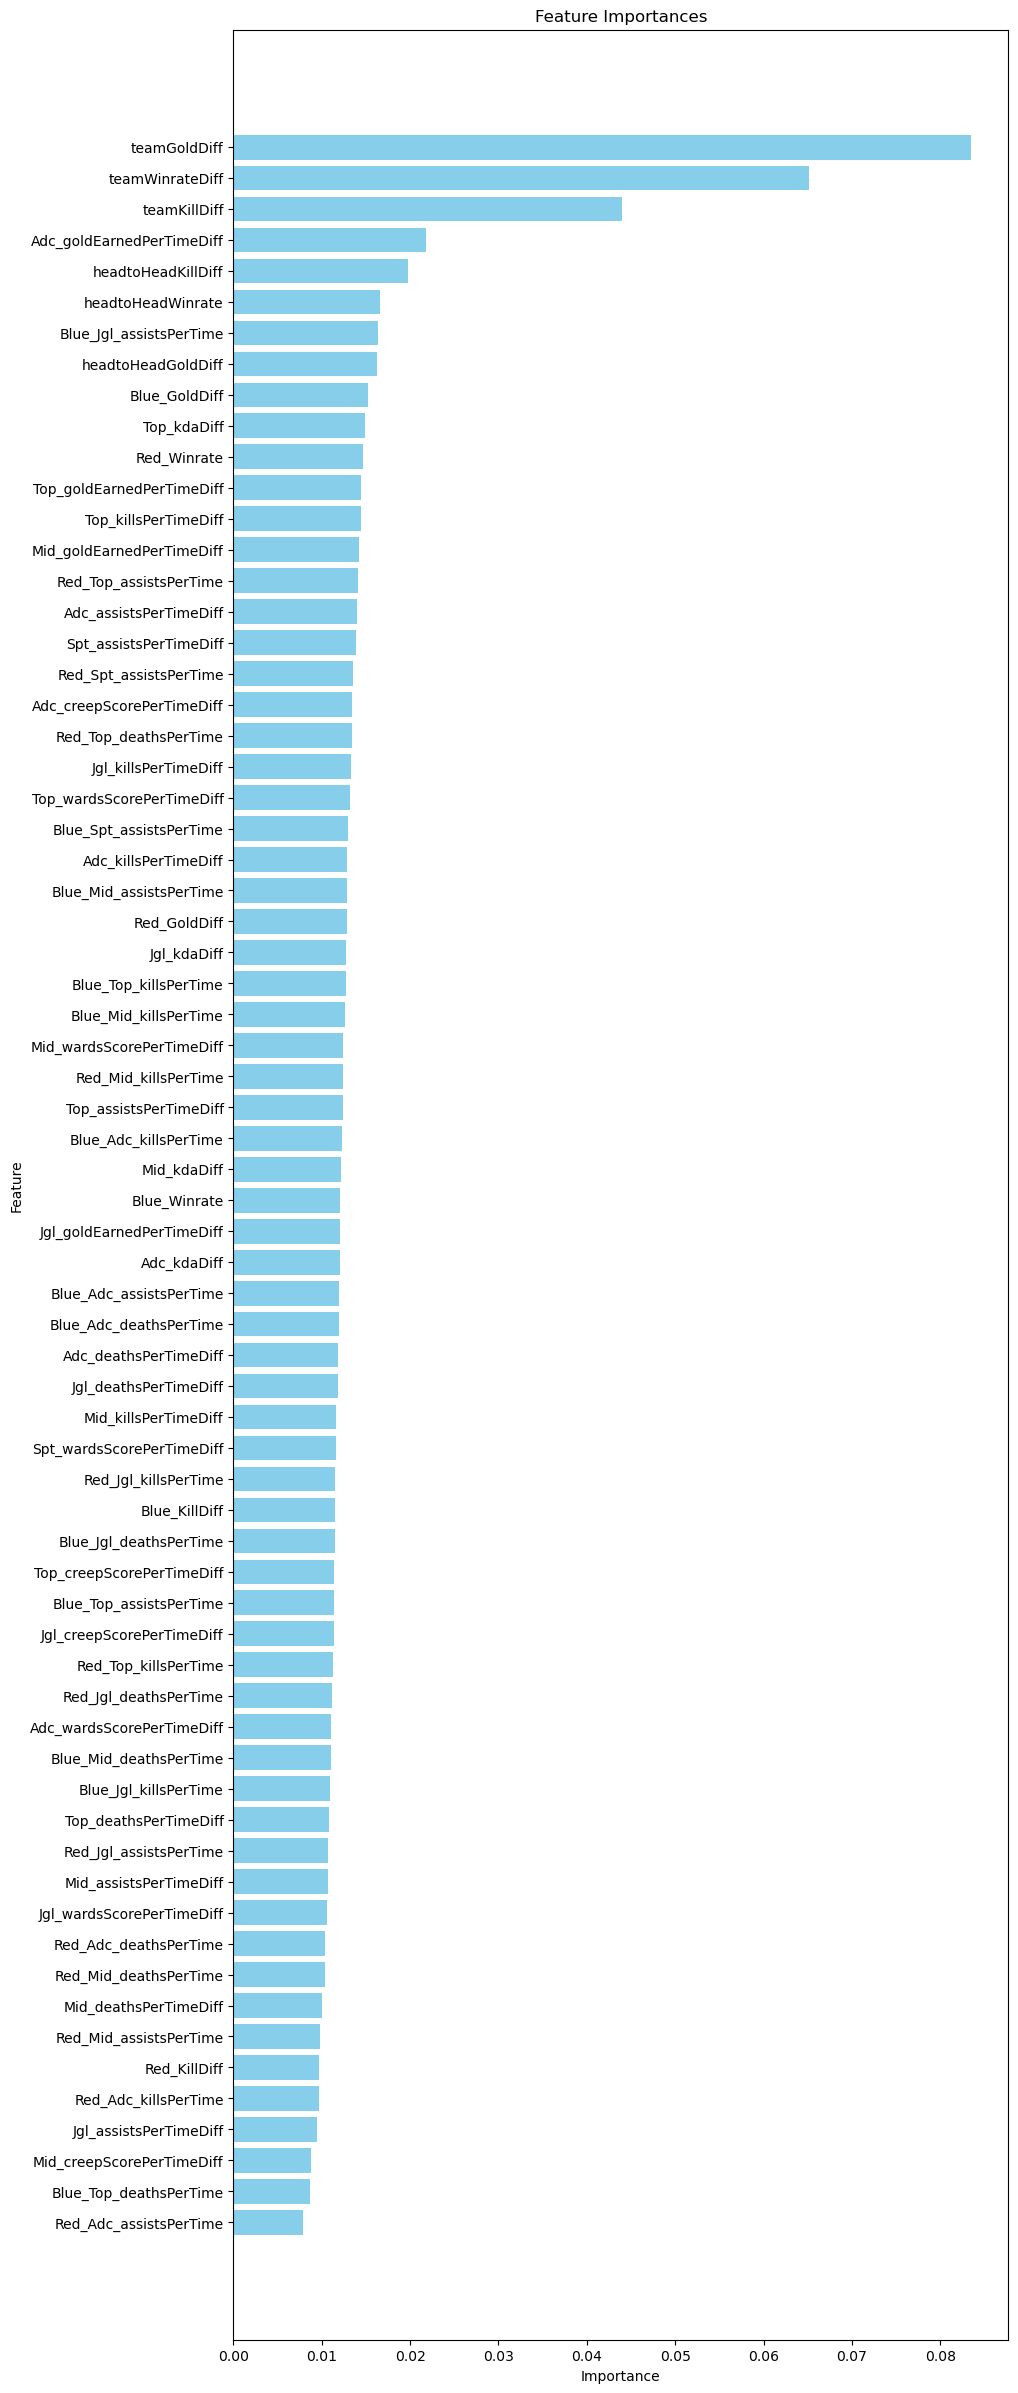

In [23]:
plt.figure(figsize=(10, 30))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()